In [1]:
import tensorflow as tf

In [2]:
# Load the data 
from sklearn.datasets import load_breast_cancer
data = load_breast_cancer()

#Data Splitting
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data.data, data.target, test_size=0.3,random_state=0)

numOfInstances, numOfFeatures = X_train.shape #(398,30)

In [3]:
#Normalizing
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [4]:
# Define the model
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Dense(units=1, input_shape=[numOfFeatures], activation='sigmoid'))
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [5]:
# Train the model
r = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=100)

Epoch 1/100
13/13 [==============================] - 5s 15ms/step - loss: 0.6280 - accuracy: 0.6834 - val_loss: 0.5763 - val_accuracy: 0.7251
Epoch 2/100
13/13 [==============================] - 0s 5ms/step - loss: 0.5696 - accuracy: 0.7337 - val_loss: 0.5260 - val_accuracy: 0.7661
Epoch 3/100
13/13 [==============================] - 0s 5ms/step - loss: 0.5188 - accuracy: 0.7663 - val_loss: 0.4837 - val_accuracy: 0.7836
Epoch 4/100
13/13 [==============================] - 0s 5ms/step - loss: 0.4762 - accuracy: 0.8116 - val_loss: 0.4474 - val_accuracy: 0.8012
Epoch 5/100
13/13 [==============================] - 0s 5ms/step - loss: 0.4398 - accuracy: 0.8367 - val_loss: 0.4161 - val_accuracy: 0.8187
Epoch 6/100
13/13 [==============================] - 0s 4ms/step - loss: 0.4077 - accuracy: 0.8593 - val_loss: 0.3900 - val_accuracy: 0.8480
Epoch 7/100
13/13 [==============================] - 0s 6ms/step - loss: 0.3809 - accuracy: 0.8719 - val_loss: 0.3674 - val_accuracy: 0.8713
Epoch 8/100


In [6]:
# Evaluate the model, prints loss and accuracy
print("Train score:", model.evaluate(X_train, y_train))
print("Test score:", model.evaluate(X_test, y_test))

13/13 [==============================] - 0s 4ms/step - loss: 0.0876 - accuracy: 0.9774
Train score: [0.08757398277521133, 0.9773869514465332]
6/6 [==============================] - 0s 4ms/step - loss: 0.0994 - accuracy: 0.9766
Test score: [0.09942729771137238, 0.9766082167625427]


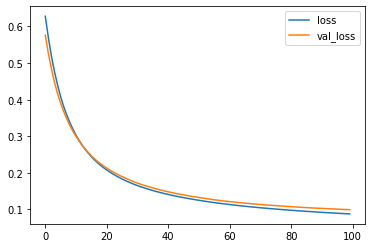

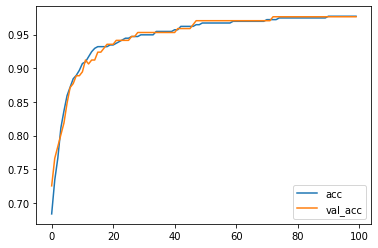

In [8]:
# Plot the loss
import matplotlib.pyplot as plt
plt.plot(r.history['loss'], label='loss')
plt.plot(r.history['val_loss'], label='val_loss')
plt.legend()
plt.show()

# Plot the accuracy 
plt.plot(r.history['accuracy'], label='acc')
plt.plot(r.history['val_accuracy'], label='val_acc')
plt.legend()
plt.show()

In [9]:
# Make predictions
y_pred = model.predict(X_test)
print(y_pred) # they are outputs of the sigmoid, interpreted as probabilities p(y = 1 | x)

[[9.98115540e-01]
 [6.93346665e-04]
 [9.92179513e-01]
 [9.93705690e-01]
 [9.97835338e-01]
 [9.99718845e-01]
 [7.61156440e-01]
 [4.42754447e-01]
 [8.16649481e-06]
 [6.86261686e-04]
 [5.32646212e-08]
 [2.77390219e-02]
 [9.17607188e-01]
 [7.63958514e-01]
 [9.91466761e-01]
 [8.88789058e-01]
 [8.59639645e-01]
 [9.81910288e-01]
 [9.69335258e-01]
 [1.19882182e-03]
 [9.99049008e-01]
 [8.60950910e-03]
 [1.37785659e-03]
 [9.43869293e-01]
 [1.26372845e-06]
 [9.71974134e-01]
 [5.96811988e-05]
 [6.36055917e-02]
 [6.24003974e-07]
 [2.64688998e-01]
 [4.95817438e-02]
 [2.13482097e-04]
 [1.82631845e-03]
 [9.57018733e-01]
 [7.70951033e-01]
 [4.22885448e-01]
 [9.98653889e-01]
 [9.78169203e-01]
 [2.21722111e-01]
 [6.27379690e-04]
 [3.12791701e-04]
 [9.85715091e-01]
 [9.91771281e-01]
 [8.90291645e-04]
 [9.80352044e-01]
 [1.18198386e-05]
 [8.16000276e-04]
 [9.81881320e-01]
 [2.03379550e-05]
 [9.98184621e-01]
 [8.79855216e-01]
 [9.98841226e-01]
 [8.88278417e-04]
 [1.85780780e-04]
 [5.16170356e-03]
 [5.322404

In [10]:
# Round to get the actual predictions
# Note: has to be flattened since the targets are size (N,) while the predictions are size (N,1)
import numpy as np
y_pred = np.round(y_pred).flatten()
print(y_pred)

[1. 0. 1. 1. 1. 1. 1. 0. 0. 0. 0. 0. 1. 1. 1. 1. 1. 1. 1. 0. 1. 0. 0. 1.
 0. 1. 0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 1. 1. 0. 0. 0. 1. 1. 0. 1. 0. 0. 1.
 0. 1. 1. 1. 0. 0. 0. 0. 1. 0. 1. 0. 0. 1. 1. 0. 1. 1. 1. 1. 1. 1. 0. 1.
 1. 1. 0. 0. 1. 1. 0. 0. 1. 1. 1. 0. 0. 1. 0. 0. 1. 1. 1. 0. 0. 1. 0. 1.
 1. 0. 1. 0. 1. 1. 1. 1. 1. 1. 0. 1. 0. 0. 1. 0. 1. 1. 1. 0. 1. 1. 0. 0.
 1. 1. 0. 0. 1. 1. 0. 0. 0. 1. 1. 1. 1. 1. 1. 0. 0. 0. 0. 1. 1. 1. 0. 0.
 1. 0. 0. 0. 1. 1. 0. 1. 1. 1. 1. 0. 1. 0. 0. 1. 0. 0. 0. 1. 0. 1. 1. 1.
 1. 0. 1.]


In [11]:
# Calculate the accuracy, compare it to evaluate() output
print("Manually calculated accuracy:", np.mean(y_pred == y_test))
print("Evaluate output:", model.evaluate(X_test, y_test))


Manually calculated accuracy: 0.9766081871345029
6/6 [==============================] - 0s 3ms/step - loss: 0.0994 - accuracy: 0.9766
Evaluate output: [0.09942729771137238, 0.9766082167625427]


In [12]:
model.save('ClassificationNN.h5')

In [13]:
!ls

ClassificationNN.h5  sample_data


In [14]:
# Let's load the model and confirm that it still works
# Note: there is a bug in Keras where load/save only works if you DON'T use the Input() layer explicitly
# So, make sure you define the model with ONLY Dense(1, input_shape=(D,))
# At least, until the bug is fixed
# https://github.com/keras-team/keras/issues/10417
model = tf.keras.models.load_model('ClassificationNN.h5')
print(model.layers)
model.evaluate(X_test, y_test)

6/6 [==============================] - 0s 3ms/step - loss: 0.0994 - accuracy: 0.9766


[0.09942729771137238, 0.9766082167625427]